In [674]:
import pandas as pd
import random
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [754]:
#orignal data entries 4,35,589 (was exceding cpu limit)
n= 435589-1 #number of records in file (excludes header)
s=108962 # no. of sampels about 25%
file='vehicles.csv'
skip=sorted(random.sample(range(1,n),n-s))                                      
X=pd.read_csv(file,skiprows=skip)

In [755]:
X.shape

(109223, 25)

In [756]:
X.head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7120836145,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,29500,2017.0,toyota,tacoma sr v6 - trd off r,NaN,6 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00S0S_5nsac5CNmY...,D&M Motors LLC STOCK #: R090311 ...,NaN,or,45.5772,-122.6760
1,7120429277,https://maine.craigslist.org/cto/d/berwick-tru...,maine,https://maine.craigslist.org,2750,2006.0,chevrolet,silverado 2500hd ext cab,good,8 cylinders,...,4wd,NaN,truck,white,https://images.craigslist.org/00s0s_gIIcBkENHK...,2006 6.0 liter Chevy extended cab 4wd automati...,NaN,me,43.2899,-70.8550
2,7120426801,https://maine.craigslist.org/ctd/d/harpswell-m...,maine,https://maine.craigslist.org,0,2016.0,chevrolet,high country,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00f0f_3h0bIrEe74...,If you're needing a reliable vehicle and your ...,NaN,me,43.7811,-69.9955


In [678]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109223 entries, 0 to 109222
Data columns (total 25 columns):
id              109223 non-null int64
url             109223 non-null object
region          109223 non-null object
region_url      109223 non-null object
price           109223 non-null int64
year            108951 non-null float64
manufacturer    104074 non-null object
model           107685 non-null object
condition       62532 non-null object
cylinders       67463 non-null object
fuel            108499 non-null object
odometer        90581 non-null float64
title_status    108753 non-null object
transmission    108690 non-null object
vin             60147 non-null object
drive           78699 non-null object
size            34880 non-null object
type            79805 non-null object
paint_color     75334 non-null object
image_url       109219 non-null object
description     109218 non-null object
county          0 non-null float64
state           109223 non-null object
lat 

#### Percentage of Null Values in Columns:

In [679]:
X.isnull().sum()/X.shape[0]*100 #Null Value Precentage

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.249032
manufacturer      4.714209
model             1.408128
condition        42.748322
cylinders        38.233705
fuel              0.662864
odometer         17.067834
title_status      0.430312
transmission      0.487992
vin              44.931928
drive            27.946495
size             68.065334
type             26.933888
paint_color      31.027348
image_url         0.003662
description       0.004578
county          100.000000
state             0.000000
lat               1.916263
long              1.916263
dtype: float64

In [757]:
#Removing irelevent parameters: 
X.drop(['id','url','region_url','vin',
        'image_url','county','lat','size',
        'long','description'],axis=1,inplace=True)

In [758]:
X.describe()

,price,year,odometer
count,1.092230e+05,108961.000000,9.022600e+04
mean,4.374220e+04,2009.845651,9.907217e+04
std,5.710943e+06,9.332419,1.059816e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2007.000000,4.714150e+04
50%,9.991000e+03,2012.000000,9.138700e+04
75%,1.795000e+04,2015.000000,1.350000e+05
max,1.410065e+09,2021.000000,1.000000e+07


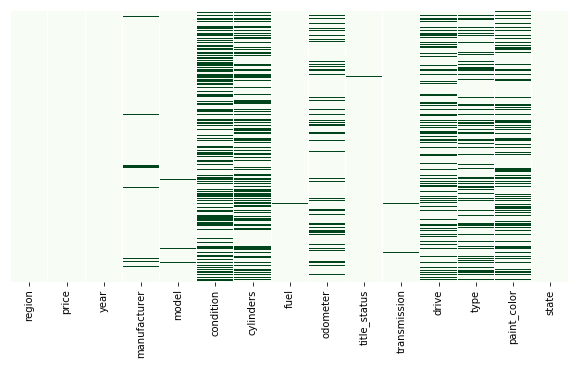

In [759]:
plt.figure(figsize=(10,5))
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.show()   # col Values in color on x-axis relates to amount of nullnes in columns: 

In [760]:
X.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,oregon coast,29500,2017.0,toyota,tacoma sr v6 - trd off r,NaN,6 cylinders,gas,19309.0,rebuilt,automatic,4wd,truck,NaN,or
1,maine,2750,2006.0,chevrolet,silverado 2500hd ext cab,good,8 cylinders,gas,165000.0,clean,automatic,4wd,truck,white,me
2,maine,0,2016.0,chevrolet,high country,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,me


### EDA:

#### Problem Statment:(Considered key features according to domain knowleged for eda)
* Here we consider catogerical features against numerical continous features
* And Catogerical features with each other sequencialy to cover the bivariant relationship of each features.

Univariant(Dtype Catogerical):
* who are the top manufactures in sale
* which fuel type of cars are more on sale
* Which transmission type is more prefered
* peak in sale based on vehicel condition
* count of Type of Drive for vehicels on sale
* peak in sale based on vehicel Paint-color of vehicel. 

Univariant(Dtype Numerical) :  
* overall odometer(distance Driven) count distribution  
* overall vehicels price distribution   

Bivariant wrt Target (Sale Price):
avg Sale price of car according to:
* manufacturer
* fuel type
* transmission
* condition 
* Drive
* Paint_color
* odometer (Scatter plot)

Bivariant based on odometer(Distance Driven):
* Which manufatures has more or less distance driven cars
* which fuel type has more odometer count
* Odometer count based on type of transmission
* impact of Distance Driven on condition of vehicel
* Overall vehicel driven according to its Drive Type  

Bivariant based on condition:
* condition of vehicel based on which manufacturer is vehicel of.
* condition of vehicels based on fuel type you chose
* condition based on transmission
* Condition of vehicel based on drive type.

bivariant based on fuel type:
* different fuel type vechicels availabel with manufacturer
* different fueltype vehicels availabel with different transmission
* different fueltype vehicels availabel with different Drive types.

Bivariant based on transmission:
* Different type of trnsmission vehicel availabel with manufacturer
* Different type of trnsmission vehicel availabel with Differnt Drive types.

Bivariant based on Drive Type:
* No. of manufactures availabel in type of transsmission.

Forecasting Sale:
* With the use of above mentioned independent features we can predict the sale value for vehicel using supervised ml(regression)


### 1. Univariant Analysis (Catogerical):

* The function provides count for univariant analysis of requried independent variabels.

In [684]:
def plot(col):
    plt.figure(figsize=(10,5))
    sns.countplot(X[col],palette='Greens_r')
    plt.xticks(rotation=90)
    plt.title('conut of '+col)
    plt.show()
    
    print('Percentage Distribution of '+col)
    print(X[col].value_counts(normalize=True)*100)
    
    print('')
    print('1. From the Above info. vehicel with',X[col].value_counts().index[0],col,'has the maximum Sale')
    print('2. While the vehicel with',X[col].value_counts().sort_values(ascending=True).index[0],col,'has the minimum Sale')
    print('')
    
    print('--------------------------------------------------------------------------------------------------')

Problem Satments: (For univariant Catogarical variabels)
* who are the top manufactures in sale
* which fuel type of cars are more on sale
* Which transmission type is more prefered
* peak in sale based on vehicel condition
* Which Type of Drive for vehicels is more on sale
* peak in sale based on vehicel Paint-color of vehicel.
* Which Engines wrt to no. of Cylindes is more prefered.

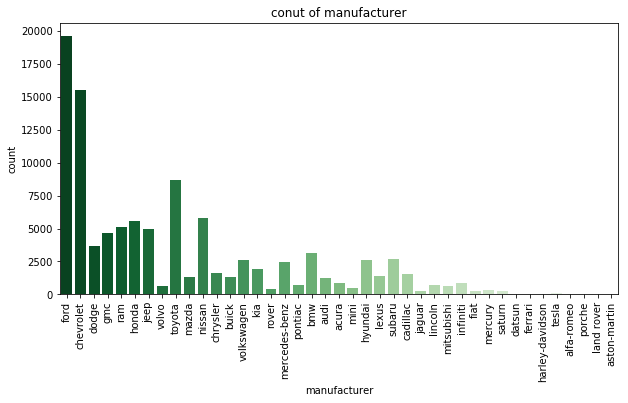

Percentage Distribution of manufacturer
ford               18.864462
chevrolet          14.911505
toyota              8.353671
nissan              5.593136
honda               5.341392
ram                 4.924381
jeep                4.739897
gmc                 4.452601
dodge               3.510963
bmw                 2.982493
subaru              2.576052
hyundai             2.537617
volkswagen          2.479966
mercedes-benz       2.338721
kia                 1.881354
chrysler            1.577724
cadillac            1.503738
lexus               1.363453
buick               1.298115
mazda               1.255837
audi                1.225090
infiniti            0.822492
acura               0.796549
lincoln             0.696620
pontiac             0.667794
volvo               0.644734
mitsubishi          0.580356
mini                0.443915
rover               0.418933
mercury             0.286335
saturn              0.284413
fiat                0.230605
jaguar              0.229644
tes

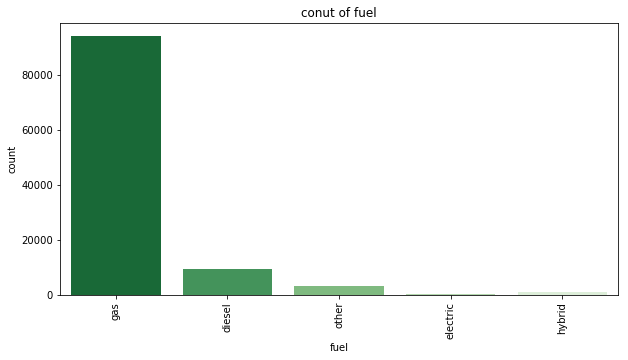

Percentage Distribution of fuel
gas         86.895732
diesel       8.772431
other        3.118001
hybrid       0.977889
electric     0.235947
Name: fuel, dtype: float64

1. From the Above info. vehicel with gas fuel has the maximum Sale
2. While the vehicel with electric fuel has the minimum Sale

--------------------------------------------------------------------------------------------------


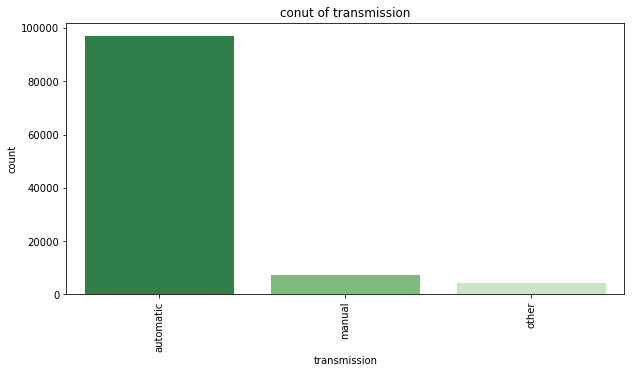

Percentage Distribution of transmission
automatic    89.366087
manual        6.618824
other         4.015089
Name: transmission, dtype: float64

1. From the Above info. vehicel with automatic transmission has the maximum Sale
2. While the vehicel with other transmission has the minimum Sale

--------------------------------------------------------------------------------------------------


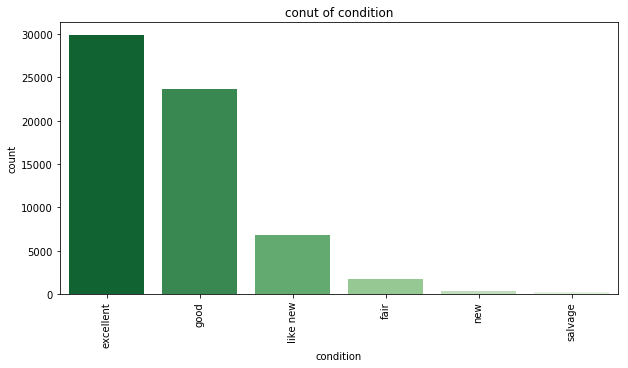

Percentage Distribution of condition
excellent    47.737159
good         37.756669
like new     10.856841
fair          2.820956
new           0.530928
salvage       0.297448
Name: condition, dtype: float64

1. From the Above info. vehicel with excellent condition has the maximum Sale
2. While the vehicel with salvage condition has the minimum Sale

--------------------------------------------------------------------------------------------------


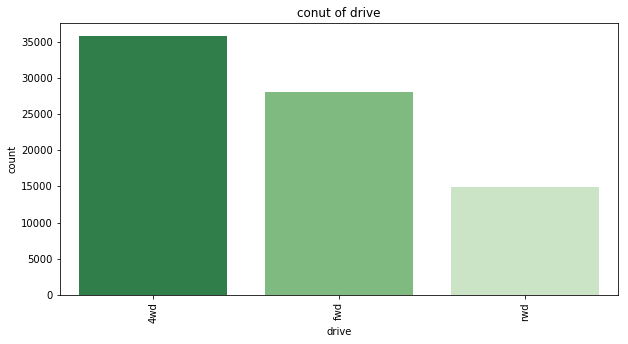

Percentage Distribution of drive
4wd    45.430056
fwd    35.543018
rwd    19.026925
Name: drive, dtype: float64

1. From the Above info. vehicel with 4wd drive has the maximum Sale
2. While the vehicel with rwd drive has the minimum Sale

--------------------------------------------------------------------------------------------------


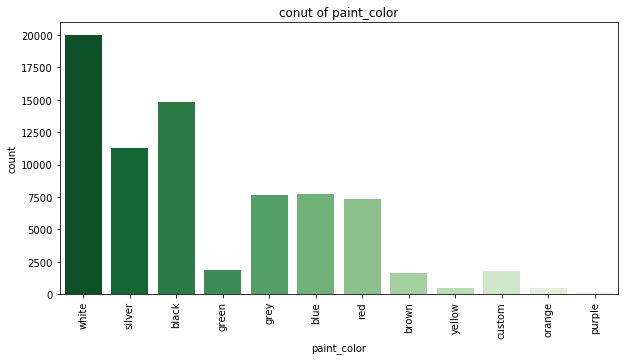

Percentage Distribution of paint_color
white     26.509942
black     19.696286
silver    14.989248
blue      10.231768
grey      10.136193
red        9.759206
green      2.439801
custom     2.426527
brown      2.222104
yellow     0.692914
orange     0.669021
purple     0.226989
Name: paint_color, dtype: float64

1. From the Above info. vehicel with white paint_color has the maximum Sale
2. While the vehicel with purple paint_color has the minimum Sale

--------------------------------------------------------------------------------------------------


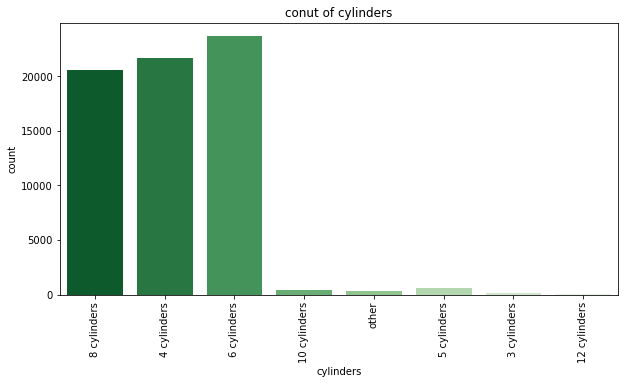

Percentage Distribution of cylinders
6 cylinders     35.152602
4 cylinders     32.063501
8 cylinders     30.517469
5 cylinders      0.941257
10 cylinders     0.604776
other            0.456547
3 cylinders      0.195663
12 cylinders     0.068186
Name: cylinders, dtype: float64

1. From the Above info. vehicel with 6 cylinders cylinders has the maximum Sale
2. While the vehicel with 12 cylinders cylinders has the minimum Sale

--------------------------------------------------------------------------------------------------


In [685]:
col=['manufacturer','fuel','transmission','condition','drive','paint_color','cylinders']
for i in col:
    plot(i)

### 1.1 Univariant Analysis (Continous Var.):

Statments :  
* overall vehicels price distribution
* overall odometer(distance Driven) count distribution  

1) Vehicel Price Count Distribution in Data:

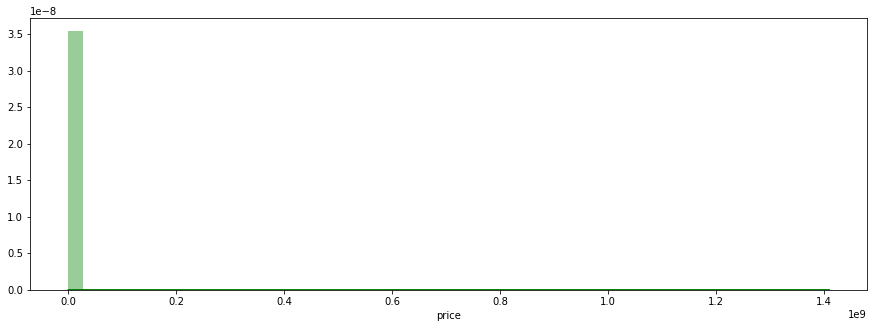

In [762]:
plt.figure(figsize=(15,5))
sns.distplot(X['price'],color='g')
plt.show()

* From Above figure we can see most of the sale of vehicel lies with in price rang of below 0.6^10le9 
* Therefore reducing the range .

In [805]:
X['price'].min()

0

In [768]:
X['price'].max()

1410065407

In [764]:
X[X['price']>500000].shape  # Here we can observe the Amount of data above 500k is less.

(16, 15)

In [765]:
X[X['price']<500000].shape  # Most of the data lies within the range below 500k therefor reducing the range. 

(109207, 15)

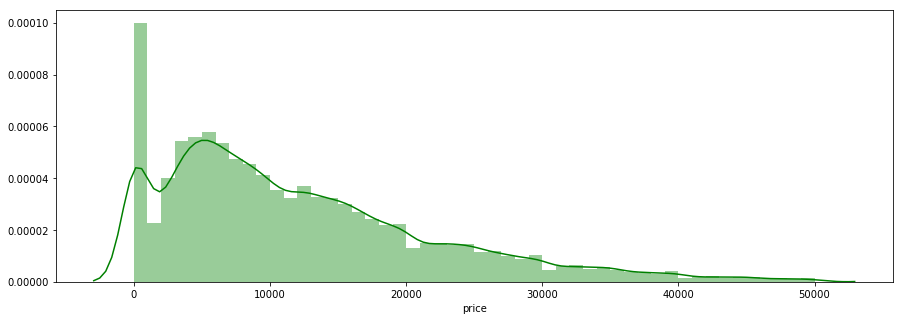

In [766]:
plt.figure(figsize=(15,5))
sns.distplot(X[X['price']<50000]['price'],color='g')
plt.show()

* Now Here we can understood Max amount of the Vehicel resale was between 0-10000 price Range. 

* From Above info we can Form price bins:(will be used to fill null values)

In [767]:
X['price'].max()

1410065407

In [769]:
bins=[0,10000,20000,30000,50000,1410065407]
group=['low','average','high','very high','Exterme']
X['Price_bins']=pd.cut(X['price'],bins,labels=group)
X['Price_bins']=X['Price_bins'].fillna(X['Price_bins'].mode()[0])

In [770]:
X['Price_bins'].value_counts()

low          56329
average      31646
high         13295
very high     6675
Exterme       1278
Name: Price_bins, dtype: int64

2) odometer count Distribution in data:

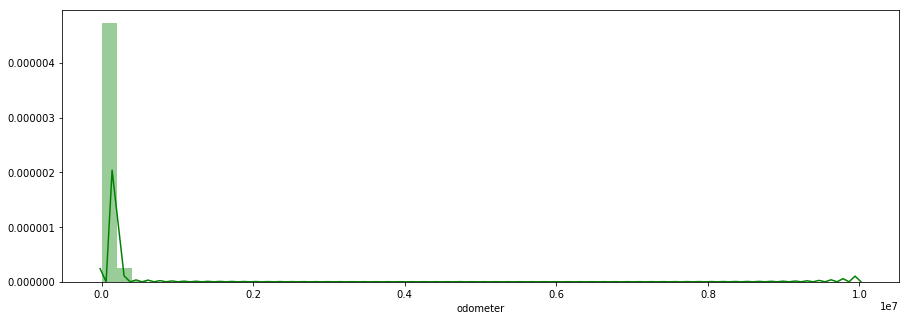

In [694]:
plt.figure(figsize=(15,5))
sns.distplot(X['odometer'].dropna(),color='g')
plt.show()

* From Above fig we can see most of the data lies with in range 200000 miles 

In [695]:
X[X['odometer']<=2000000].shape # most of the data lies within 0.2 x le7

(90559, 16)

In [696]:
X[X['odometer']>2000000].shape # While only fraction of data lies with above value

(22, 16)

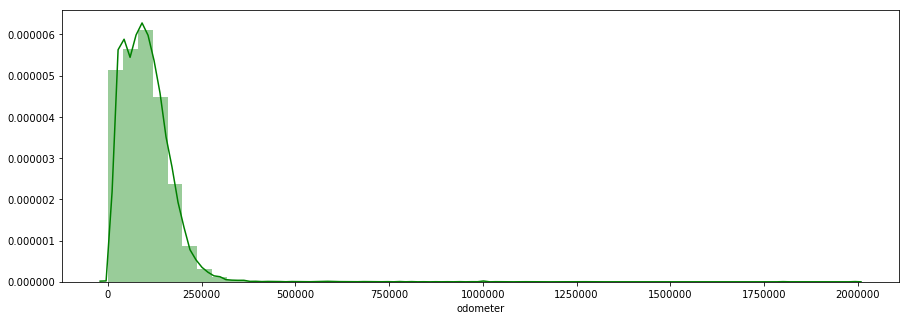

In [697]:
plt.figure(figsize=(15,5))
sns.distplot(X[X['odometer']<2000000]['odometer'].dropna(),color='g')
plt.show() # Still the data lies with in the limit of 750000

In [698]:
X[X['odometer']<=750000].shape   # we can see most of data lying below 750000 odometer range.

(90415, 16)

In [699]:
X[(X['odometer']>=750000) & (X['odometer']<=2000000)].shape 
# While between 750000-2000000 range is too long and data is less.

(147, 16)

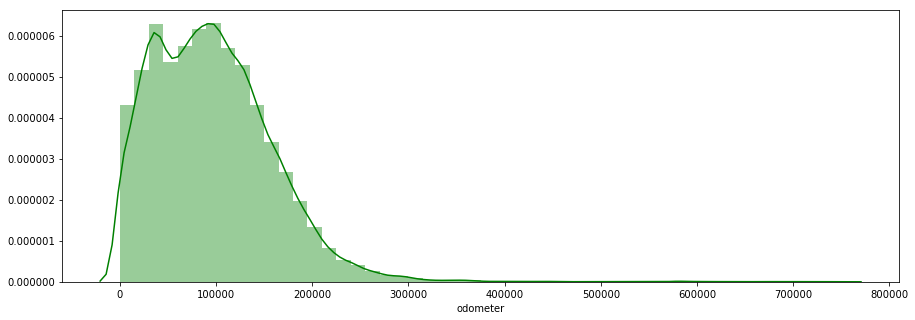

In [700]:
plt.figure(figsize=(15,5))
sns.distplot(X[X['odometer']<=750000]['odometer'].dropna(),color='g')
plt.show()

* From Above Figure we can see there is peak in sale when the Driven range is in the range of 100k to 200k miles

* With help of Avobe info. we can form bins for odometer reading for filling null values futher.

In [701]:
bins=[0,100000,300000,750000,2000000,10000000]
group=['low','average','high','very high','Exterme']
X['odometer_bins']=pd.cut(X['odometer'],bins,labels=group)
X['odometer_bins']=X['odometer_bins'].fillna(X['odometer_bins'].mode()[0])
X['odometer_bins'].value_counts()

low          69396
average      39184
high           477
very high      144
Exterme         22
Name: odometer_bins, dtype: int64

### 2. Bivariant analysis (wrt Target Sales Price): 

In [702]:
def plots(c):
    plt.figure(figsize=(15,5))
    X['price'].groupby(X[c]).mean().plot(kind='bar',color='g',alpha=0.6)
    plt.title('Avg. Price Vs '+c)
    plt.show()
    
    print('Avg. Price For Number of')
    print(X['price'].groupby(X[c]).mean().sort_values(ascending=False))
    
    print('')
    print('From above info.',X['price'].groupby(X[c]).mean().sort_values(ascending=False).index[0],c,'has maximum Avg Price')
    print('From above info.',X['price'].groupby(X[c]).mean().sort_values(ascending=True).index[0],c,'has minimum Avg Price')
    print('')
    
    print('--------------------------------------------------------------------------------------------------')
        

Bivariant wrt Target (avg Sale price of car according to:)
 
* manufacturer
* fuel type
* transmission
* condition 
* Drive
* Paint_color
* Cylinders

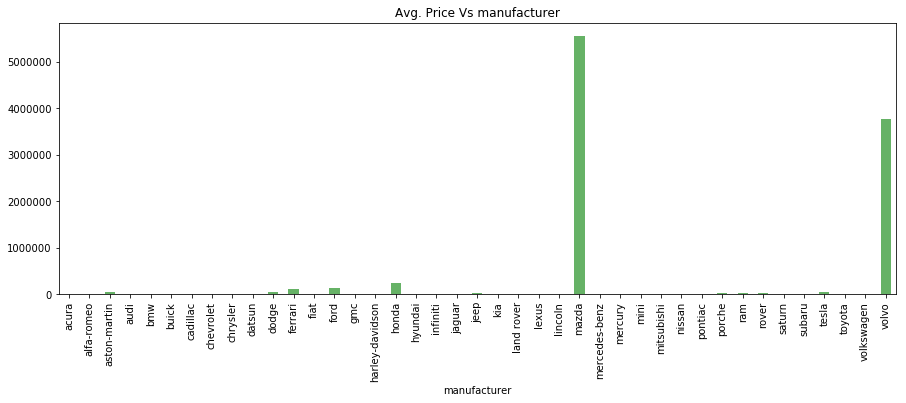

Avg. Price For Number of
manufacturer
mazda              5.563888e+06
volvo              3.768544e+06
honda              2.457547e+05
ford               1.409198e+05
ferrari            1.093069e+05
dodge              6.217780e+04
aston-martin       5.763412e+04
tesla              4.225791e+04
jeep               3.925077e+04
porche             2.658833e+04
rover              2.137219e+04
ram                1.999965e+04
alfa-romeo         1.757927e+04
gmc                1.740392e+04
mercedes-benz      1.668582e+04
chevrolet          1.543705e+04
audi               1.464143e+04
harley-davidson    1.406550e+04
cadillac           1.310212e+04
toyota             1.295621e+04
bmw                1.279312e+04
jaguar             1.248915e+04
lexus              1.204620e+04
infiniti           1.146329e+04
subaru             1.106761e+04
land rover         1.046167e+04
nissan             9.967661e+03
lincoln            9.929273e+03
mini               9.838524e+03
buick              9.416151e+03
ac

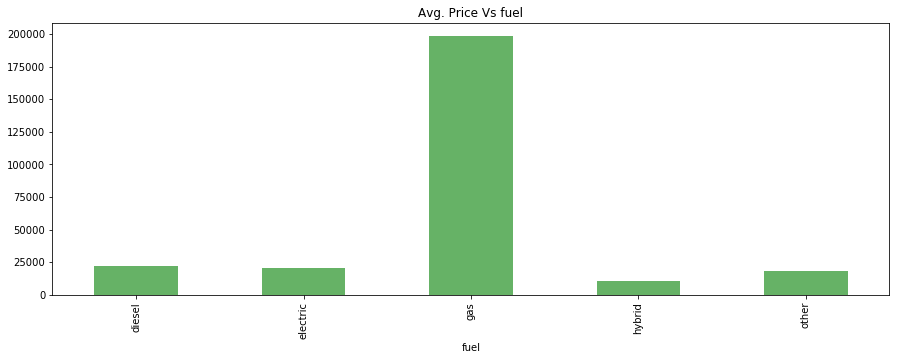

Avg. Price For Number of
fuel
gas         198450.209491
diesel       22094.652868
electric     20558.820312
other        18331.294709
hybrid       10606.830349
Name: price, dtype: float64

From above info. gas fuel has maximum Avg Price
From above info. hybrid fuel has minimum Avg Price

--------------------------------------------------------------------------------------------------


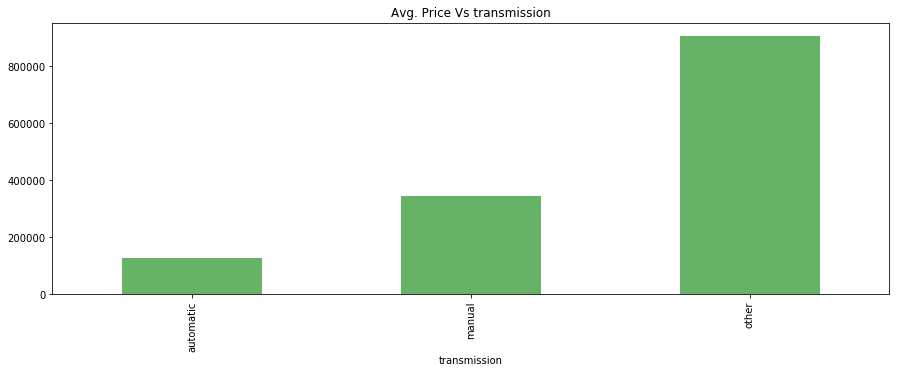

Avg. Price For Number of
transmission
other        907869.765811
manual       343697.560189
automatic    129399.519427
Name: price, dtype: float64

From above info. other transmission has maximum Avg Price
From above info. automatic transmission has minimum Avg Price

--------------------------------------------------------------------------------------------------


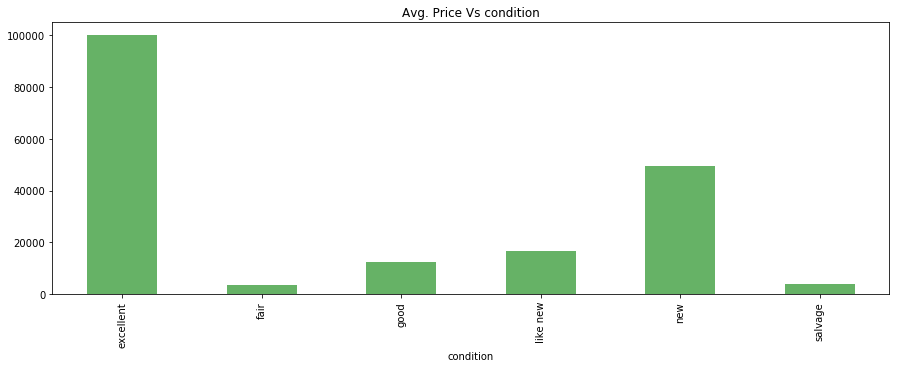

Avg. Price For Number of
condition
excellent    99997.888211
new          49548.415663
like new     16580.988953
good         12542.090258
salvage       4050.349462
fair          3605.658163
Name: price, dtype: float64

From above info. excellent condition has maximum Avg Price
From above info. fair condition has minimum Avg Price

--------------------------------------------------------------------------------------------------


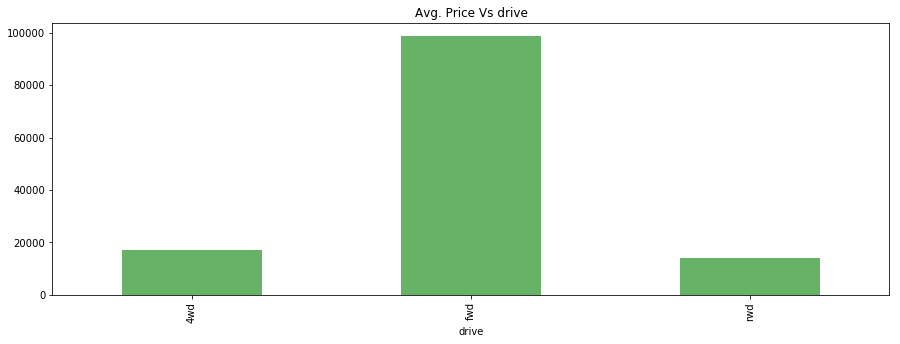

Avg. Price For Number of
drive
fwd    98728.519877
4wd    17166.327469
rwd    14002.266863
Name: price, dtype: float64

From above info. fwd drive has maximum Avg Price
From above info. rwd drive has minimum Avg Price

--------------------------------------------------------------------------------------------------


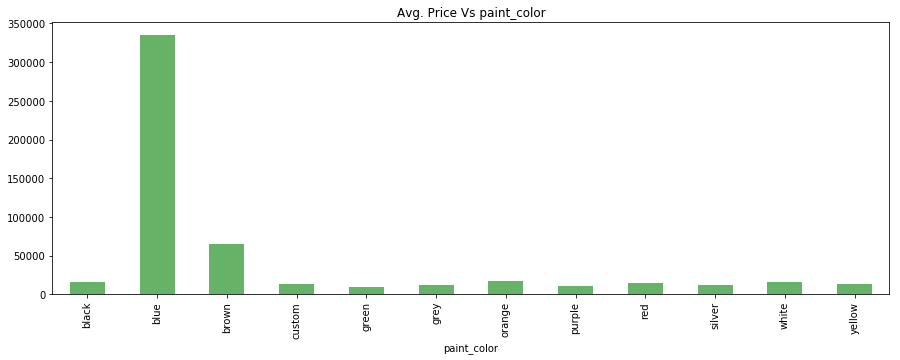

Avg. Price For Number of
paint_color
blue      334546.540218
brown      64449.434886
orange     16621.966270
white      15675.885885
black      15640.227120
red        14583.769995
yellow     13350.151341
custom     12631.530635
grey       12612.265191
silver     11856.133015
purple     10244.953216
green       9799.657780
Name: price, dtype: float64

From above info. blue paint_color has maximum Avg Price
From above info. green paint_color has minimum Avg Price

--------------------------------------------------------------------------------------------------


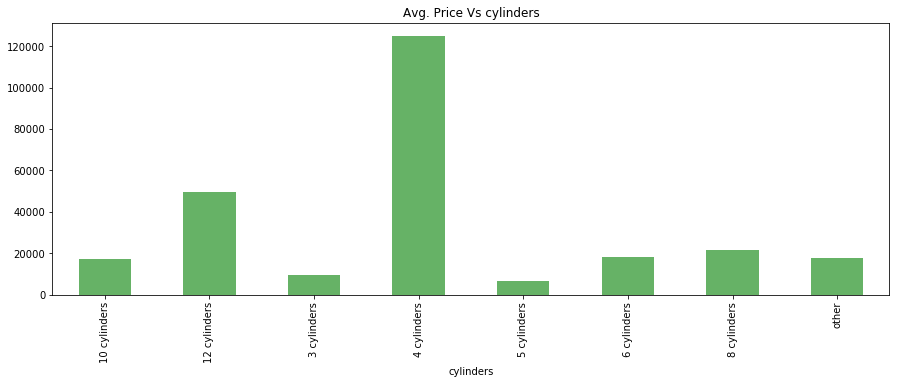

Avg. Price For Number of
cylinders
4 cylinders     125054.760575
12 cylinders     49409.695652
8 cylinders      21426.689819
6 cylinders      18006.258655
other            17726.071429
10 cylinders     17218.490196
3 cylinders       9328.848485
5 cylinders       6780.900787
Name: price, dtype: float64

From above info. 4 cylinders cylinders has maximum Avg Price
From above info. 5 cylinders cylinders has minimum Avg Price

--------------------------------------------------------------------------------------------------


In [703]:
col=['manufacturer','fuel','transmission','condition','drive','paint_color','cylinders']
for i in col:
    plots(i)

### 2.2 Bivariant Analysis (Continous var.):

1. Sale Price Vs Odometer Count:

* We Considered The lower Range According to univariant distribution of Analysis for Odometer and also for price.

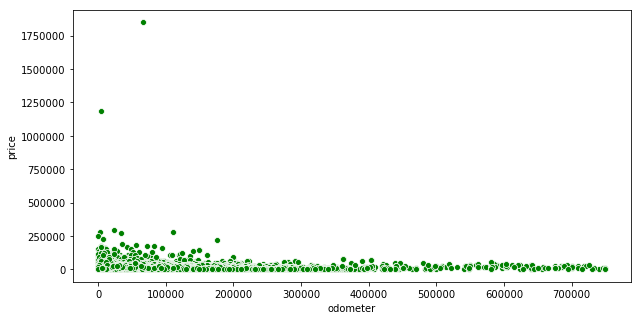

In [704]:
plt.figure(figsize=(10,5))
sns.scatterplot(X[X['odometer']<=750000]['odometer'],X[X['price']<=2000000]['price'],color='g')
plt.show()

* Here from Above Distribution We can Figure out The price Range is Higher as the Vehicel has lower odometer count (ie. vehicel is less driven)
* And the price Decreases as the Driven Range increases so there is presence of negative corelation between them.

### 3. Bivariant anlysis (wrt vehicels odometer count):

In [705]:
def plots(c):
    plt.figure(figsize=(15,5))
    X['odometer'].groupby(X[c]).mean().plot(kind='bar',cmap='Set2',alpha=0.6)
    plt.title('Avg. odometer Reading Vs '+c)
    plt.show()
    
    print('Avg. odometer Reading For Number of')
    print(X['odometer'].groupby(X[c]).mean().sort_values(ascending=False))
    
    print('')
    print('From above info.',X['odometer'].groupby(X[c]).mean().sort_values(ascending=False).index[0],c,'has maximum Avg odometer Reading')
    print('While',X['odometer'].groupby(X[c]).mean().sort_values(ascending=True).index[0],c,'has minimum Avg odometer readings')
    print('')
    
    print('--------------------------------------------------------------------------------------------------')
        

Bivariant based on odometer(Distance Driven):
* Which manufatures has more or less distance driven cars
* which fuel type has more odometer count
* Odometer count based on type of transmission
* impact of Distance Driven on condition of vehicel
* Overall vehicel driven according to its Drive Type 
* Vehicel Driven Based on Engine Cylinder Type. 

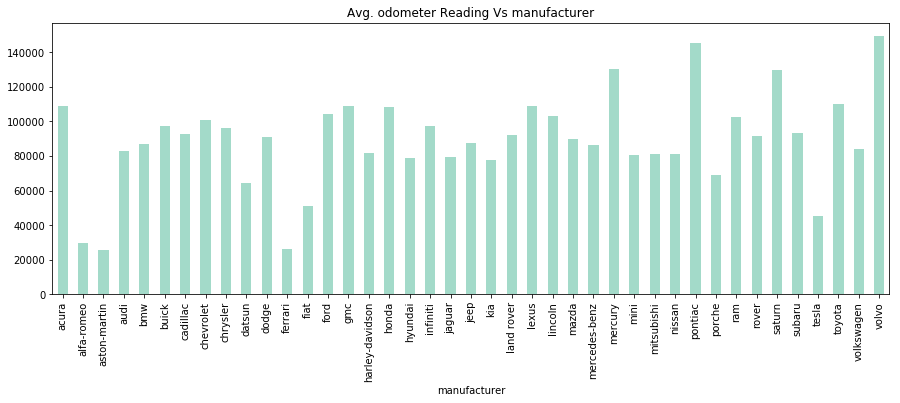

Avg. odometer Reading For Number of
manufacturer
volvo              149488.916221
pontiac            145317.501984
mercury            130269.866667
saturn             129652.439655
toyota             110066.185256
lexus              109061.273026
gmc                109057.321531
acura              108657.885174
honda              108052.841531
ford               104330.433199
lincoln            103183.696870
ram                102689.983555
chevrolet          100525.087288
buick               97504.255357
infiniti            97016.505510
chrysler            96193.663426
subaru              93293.061075
cadillac            92693.594406
land rover          92087.000000
rover               91643.153061
dodge               90790.799254
mazda               89709.420018
jeep                87691.606254
bmw                 87040.041651
mercedes-benz       86219.346824
volkswagen          83750.568505
audi                82910.487270
harley-davidson     81486.035714
mitsubishi          81358.0

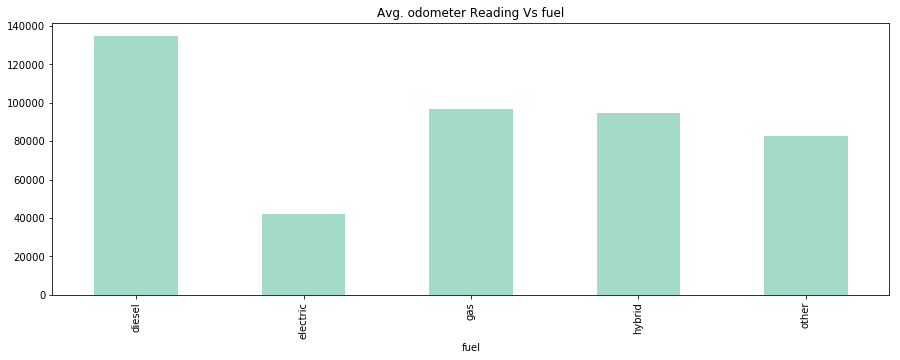

Avg. odometer Reading For Number of
fuel
diesel      134841.149785
gas          96625.630642
hybrid       94690.683932
other        82490.351645
electric     42161.625532
Name: odometer, dtype: float64

From above info. diesel fuel has maximum Avg odometer Reading
While electric fuel has minimum Avg odometer readings

--------------------------------------------------------------------------------------------------


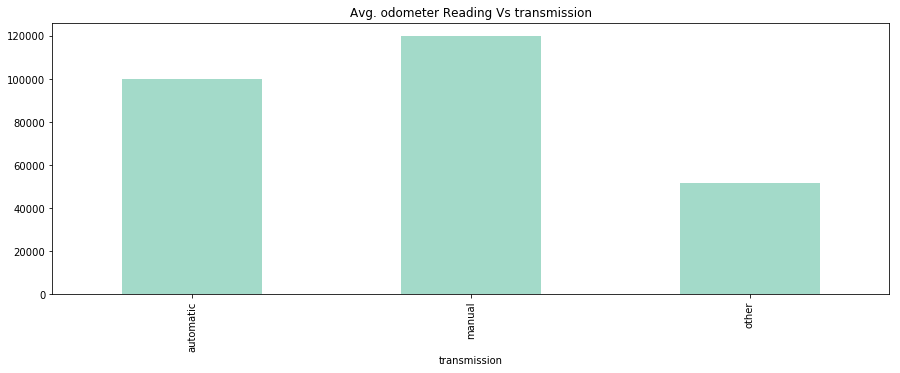

Avg. odometer Reading For Number of
transmission
manual       120158.090247
automatic    100145.591065
other         51638.322077
Name: odometer, dtype: float64

From above info. manual transmission has maximum Avg odometer Reading
While other transmission has minimum Avg odometer readings

--------------------------------------------------------------------------------------------------


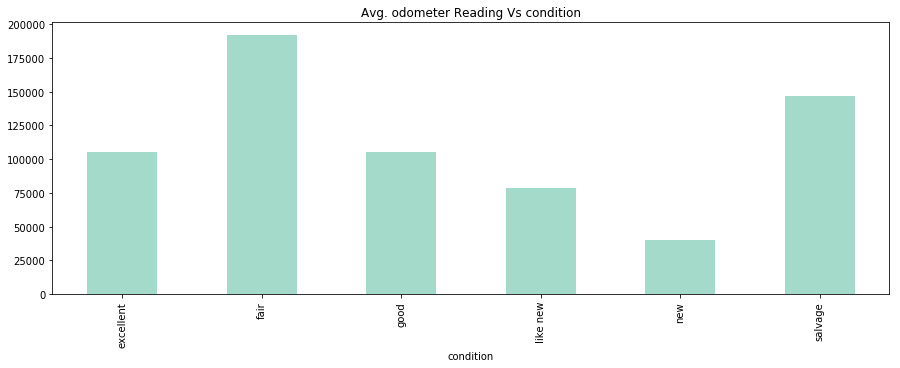

Avg. odometer Reading For Number of
condition
fair         191845.183254
salvage      146643.632479
excellent    105503.722947
good         105196.617117
like new      78684.681203
new           40312.535565
Name: odometer, dtype: float64

From above info. fair condition has maximum Avg odometer Reading
While new condition has minimum Avg odometer readings

--------------------------------------------------------------------------------------------------


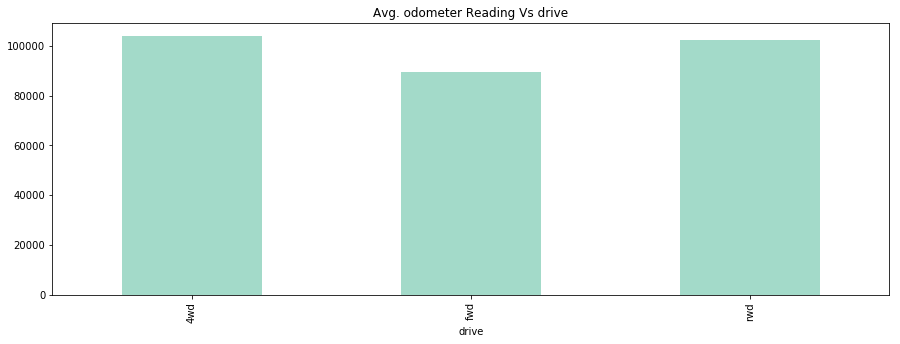

Avg. odometer Reading For Number of
drive
4wd    103940.117490
rwd    102216.745999
fwd     89501.876540
Name: odometer, dtype: float64

From above info. 4wd drive has maximum Avg odometer Reading
While fwd drive has minimum Avg odometer readings

--------------------------------------------------------------------------------------------------


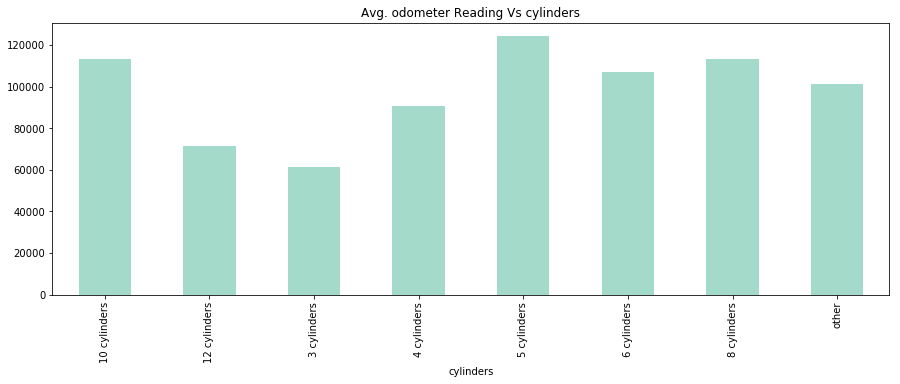

Avg. odometer Reading For Number of
cylinders
5 cylinders     124470.926957
8 cylinders     113399.130550
10 cylinders    113396.333333
6 cylinders     106906.725162
other           101126.447581
4 cylinders      90681.730611
12 cylinders     71352.534884
3 cylinders      61285.573770
Name: odometer, dtype: float64

From above info. 5 cylinders cylinders has maximum Avg odometer Reading
While 3 cylinders cylinders has minimum Avg odometer readings

--------------------------------------------------------------------------------------------------


In [706]:
col=['manufacturer','fuel','transmission','condition','drive','cylinders']
for i in col:
    plots(i)

### 4. Bivariant (wrt Condition of vehicel):

In [707]:
def plott(c):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='condition',data=X,hue=c,palette='Greens_r')
    plt.title(c+'_Distribution')
    plt.show()
    
    print('Distribution of',c)
    print(pd.crosstab(X['condition'],X[c]))

Bivariant based on condition:
* condition of vehicels based on fuel type you chose
* condition based on transmission
* Condition of vehicel based on drive type.
* Condition of vehicel based on no. of engine cylinders.

1. condition of vehicels based on fuel type you chose:

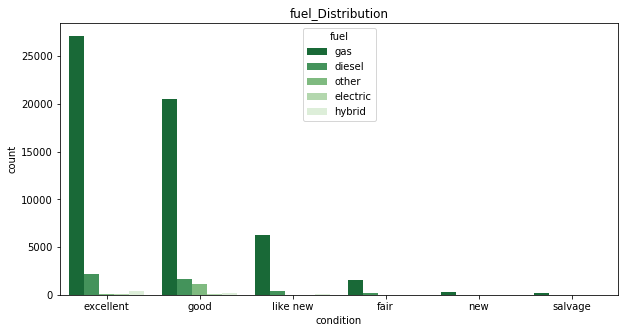

Distribution of fuel
fuel       diesel  electric    gas  hybrid  other
condition                                        
excellent    2217        54  27133     367     70
fair          172         1   1573       7     10
good         1704        68  20500     237   1101
like new      393        19   6271      86     20
new            30         2    287       5      8
salvage        14         0    163       1      8


In [708]:
plott('fuel')

* From above info we can see vehicels with fuel type gas has most amount of excellent condition cars.
* While vehicels with electric type has least amount of excellent vehicels.

 2. condition based on transmission:

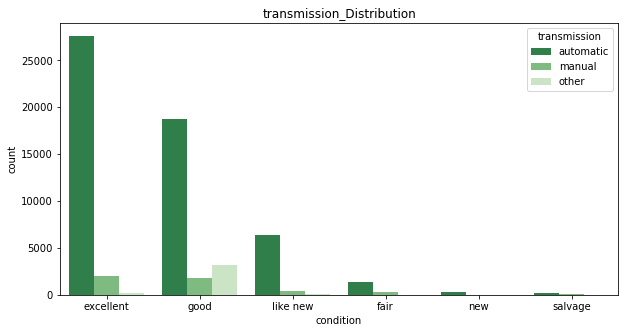

Distribution of transmission
transmission  automatic  manual  other
condition                             
excellent         27598    2027    173
fair               1403     345     16
good              18727    1755   3126
like new           6325     421     43
new                 295      25     12
salvage             146      32      8


In [709]:
plott('transmission')

* From above info we can see vehicels with transmission type auto has most amount of excellent condition cars.
* While vehicels in other type has least amount of excellent vehicels.

3. Condition of vehicel based on drive type.

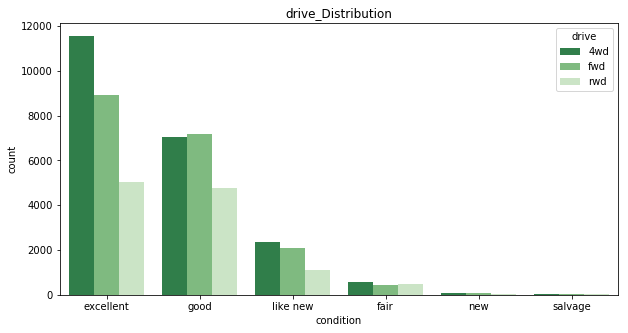

Distribution of drive
drive        4wd   fwd   rwd
condition                   
excellent  11561  8930  5039
fair         566   420   462
good        7043  7198  4763
like new    2363  2091  1088
new          100    88    53
salvage       52    58    41


In [710]:
plott('drive')

* From above info we can see vehicels with drive type four wheel drive has most amount of excellent condition cars.
* While vehicels in front wheel type has high amount of salvage vehicels.

4. Condition of vehicel based on no. of engine cylinders.

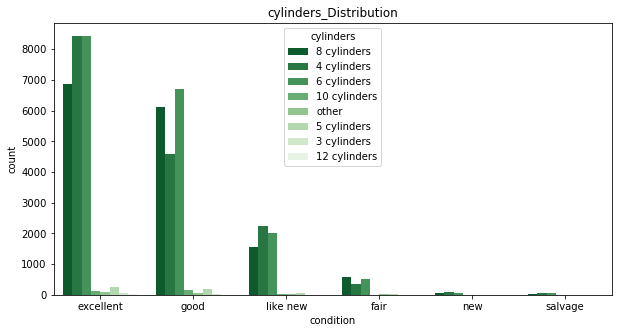

Distribution of cylinders
cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
condition                                                                      
excellent           138            22           49         8417          254   
fair                  7             1            4          364           17   
good                154             5           32         4578          179   
like new             24             1            7         2225           45   
new                   1             0            3           98            0   
salvage               6             0            0           48            3   

cylinders  6 cylinders  8 cylinders  other  
condition                                   
excellent         8432         6852     82  
fair               522          567     14  
good              6702         6130     68  
like new          2006         1560     19  
new                 72           62      3  
salvage           

In [711]:
plott('cylinders')

* From above info we can see vehicels with 8 cylinder type has most amount of excellent condition cars.
* While vehicels 12cylinder type has least amount of excellent vehicels.

### 5. Bivariant Based on Fuel Type:

In [712]:
def plot2(c):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='fuel',data=X,hue=c,palette='Greens')
    plt.title(c+'_Distribution')
    plt.show()
    
    print('Distribution of',c)
    print(pd.crosstab(X['fuel'],X[c]))

bivariant based on fuel type:
* different fueltype vehicels availabel with different transmission
* different fueltype vehicels availabel with different Drive types.
* different fueltype vehicels availabel with different cylinder types.

1. Different Fule Types Availabel in Transmmision:

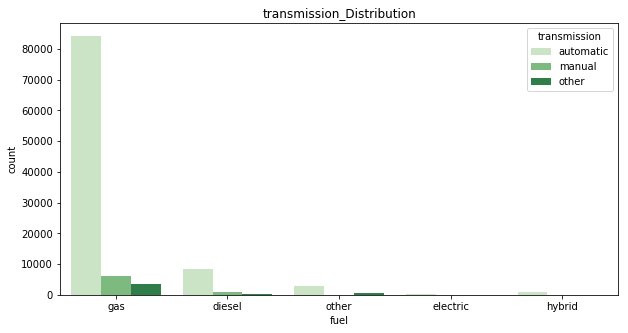

Distribution of transmission
transmission  automatic  manual  other
fuel                                  
diesel             8433     819    178
electric            164       3     87
gas               84238    6262   3458
hybrid              997      12     48
other              2710      80    569


In [713]:
plot2('transmission')

* From the Above Analysis we can conclude that Vehicels with (fuel type gas and Automatic Type of Transmission) got more resale over others.

2. Different Fuel Type Availabel in Different Drive Types:

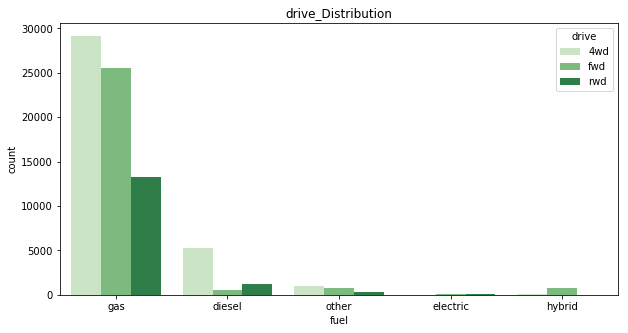

Distribution of drive
drive       4wd    fwd    rwd
fuel                         
diesel     5227    541   1170
electric      9    116     70
gas       29149  25591  13285
hybrid      102    729     31
other      1046    784    303


In [714]:
plot2('drive')

* Here we can observe that fuel type gas has more resale in four wheel type of Drive over other type. 

3. Different Fuel Type Availabel in Different Cylinder Types:

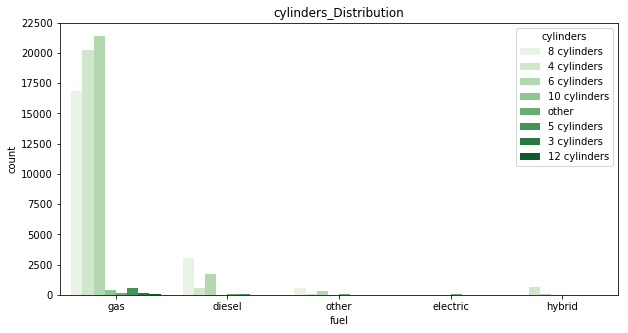

Distribution of cylinders
cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
fuel                                                                           
diesel                4             3            3          572           45   
electric              0             0            0           11            0   
gas                 403            43          123        20214          586   
hybrid                0             0            6          655            1   
other                 0             0            0           47            1   

cylinders  6 cylinders  8 cylinders  other  
fuel                                        
diesel            1751         3009     76  
electric             1            0     50  
gas              21394        16875    141  
hybrid              60           23      6  
other              316          527     35  


In [715]:
plot2('cylinders')

* From the Above Distribution we can see that vehicels with gas fuel type got more resale with 6cylinder engine type.

### 6. Bivariant Based on Transmission Type:

In [716]:
def plot3(c):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='transmission',data=X,hue=c,palette='Greens')
    plt.title(c+'_Distribution')
    plt.show()
    
    print('Distribution of',c)
    print(pd.crosstab(X['transmission'],X[c]))

* Transmission availabel with different Drive types.
* Transmissions availabel with different cylinder types.

1. Transmission Availabel with different Drve Types:

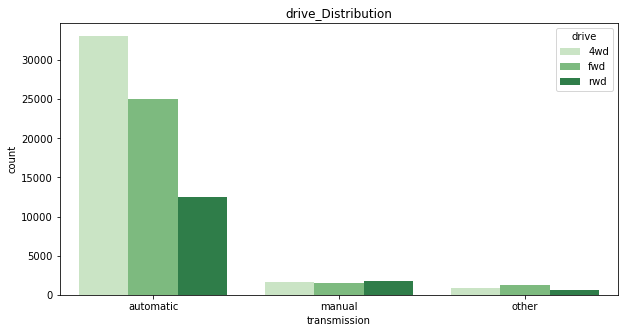

Distribution of drive
drive           4wd    fwd    rwd
transmission                     
automatic     33090  25083  12526
manual         1646   1536   1766
other           877   1201    677


In [717]:
plot3('drive')

* From the Above info. we can see that Automatic trassmision type vehicels got the highest amount of resale in 4Wheel Type of Drive.   

2. Transmission Availabel with different number of cylinders:

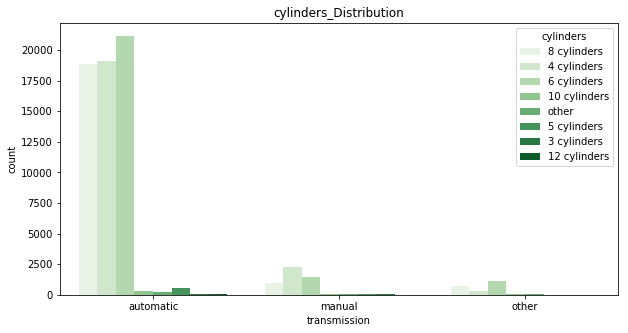

Distribution of cylinders
cylinders     10 cylinders  12 cylinders  3 cylinders  4 cylinders  \
transmission                                                         
automatic              339            42          102        19081   
manual                  28             2           28         2256   
other                   40             2            2          287   

cylinders     5 cylinders  6 cylinders  8 cylinders  other  
transmission                                                
automatic             585        21151        18872    206  
manual                 44         1430          958     53  
other                   4         1132          752     49  


In [718]:
plot3('cylinders')

* Here we can observe that transmission type automatic has max resale in 6cylinder type of engines over other type. 

### 7. Bivariant( Cylinders vs Drive type:)

In [719]:
def plot4(c):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='cylinders',data=X,hue=c,palette='Greens')
    plt.title(c+'_Distribution')
    plt.show()
    
    print('Distribution of',c)
    print(pd.crosstab(X['cylinders'],X[c]))

1. Cylinder based on different Drive types:

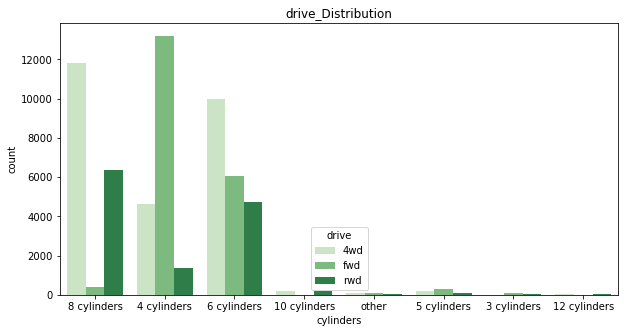

Distribution of drive
drive           4wd    fwd   rwd
cylinders                       
10 cylinders    180      4   192
12 cylinders     18      0    19
3 cylinders      11     78    26
4 cylinders    4610  13201  1378
5 cylinders     191    320    67
6 cylinders    9998   6046  4711
8 cylinders   11845    396  6379
other            81     74    65


In [720]:
plot4('drive')

* From Above info. we can observe that Engine type with 4 cylinders has maximum Resale in Front Wheel Drive Type of vehicels Drive. 